In [12]:
df = pd.read_csv('VWM_pilot/all_saccades.csv')
df.columns = map(str.lower, df.columns)
df.trial_start_time = df.trial_start_time.astype(int).fillna(0.0)

In [13]:
df1 = df[df.current_sac_amplitude  != '.']
df1 = df[df.current_sac_avg_velocity  != '.']
df1 = df1.loc[df1['current_sac_contains_blink'] == False]
del df1['current_sac_contains_blink']

In [14]:
df1.insert(0,'id',df1.recording_session_label.str[-1:])
df1.insert(0,'condition',df1.recording_session_label.str[:-3])
df1.insert(2,'trial',df1.trial_index)
df1.insert(3,'freq',df1.trial_saccade_total)
df1.insert(4,'stage','')
df1.insert(5,'trial_start','')
df1 = df1[df1.recording_session_label  != '3']
del df1['recording_session_label']
del df1['trial_index']

In [15]:
df1.current_sac_amplitude = df1.current_sac_amplitude.astype(float).fillna(0.0)
df1.current_sac_avg_velocity = df1.current_sac_amplitude.astype(float).fillna(0.0)

In [16]:

df1.insert(3,'latency','.05')
df1.insert (4,'peak_time',(df1.current_sac_peak_velocity_time - df1.trial_start_time)-df1.current_sac_start_time+1)#added 1 here because the calculated saccade duration is 1 point larger than end - start times
df1.insert(5,'peak_point',df1.peak_time/df1.current_sac_duration)
#frames.peak_time = (frames.sac_peak_velocity_time - frames.trial_start_time) - frames.sac_start_time

In [17]:
df1.columns

Index(['condition', 'id', 'trial', 'latency', 'peak_time', 'peak_point',
       'freq', 'stage', 'trial_start', 'current_sac_amplitude',
       'current_sac_avg_velocity', 'current_sac_duration',
       'current_sac_end_time', 'current_sac_index',
       'current_sac_peak_velocity', 'current_sac_peak_velocity_time',
       'current_sac_start_time', 'trial_saccade_total', 'trial_start_time',
       'trial_label'],
      dtype='object')

In [18]:
colnames = df1.columns
colnames = [['condition', 'id', 'trial', 'latency', 'peak_time','peak_point', 'freqency', 'stage','trial_start',
       'amplitude', 'avg_velocity',
       'duration', 'sac_end_time', 'sac_index',
       'peak_velocity', 'sac_peak_velocity_time',
       'sac_start_time', 'trial_saccade_total', 'trial_start_time',
       'trial_label']]
df1.columns = colnames

In [19]:
df1.sac_start_time = df1.sac_start_time.astype(int).fillna(0.0)

In [20]:
one = df1.loc[df1['id'] == '1' ]
alc1 = one.loc[one['condition'] == 'alcohol' ]
base1 = one.loc[one['condition'] == 'baseline' ]

two = df1.loc[df1['id'] == '2' ]
alc2 = two.loc[two['condition'] == 'alcohol' ]
base2 = two.loc[two['condition'] == 'baseline' ]

four = df1.loc[df1['id'] == '4' ]
alc4 = four.loc[four['condition'] == 'alcohol' ]
base4 = four.loc[four['condition'] == 'baseline' ]

In [21]:
alc1['trial_start'] = alc1.trial_start_time - 120119
base1['trial_start'] = base1.trial_start_time - 246988
alc2['trial_start'] = alc2.trial_start_time - 86955
base2['trial_start'] = base2.trial_start_time - 208937
alc4['trial_start'] = alc4.trial_start_time - 4289462 
base4['trial_start'] = base4.trial_start_time - 717280 

/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/Brook/anaconda/envs/myenv3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [22]:
frames = [alc1,alc2,alc4,base1,base2,base4]
frames = pd.concat(frames)


In [24]:
frames2 = frames.groupby(['condition','id','trial'])
frames2 = frames2.mean()
frames2 = frames2.reset_index()

frames2.to_csv('sample.csv',index=False)

In [377]:
frames.insert(9,'amp','')

In [378]:
tempamplitude =[]
for i in frames.amplitude:
    if i<=5:
        x = 5
    elif i>5 and i<=10:
        x = 10
    elif i>10 and i<15:
        x = 15
    elif i >15 and i<=20:
        x = 20
    elif i >20 and i<=25:
        x = 25
    else:
        x = 30
    tempamplitude.append(x)

In [379]:
frames.amp = tempamplitude

In [380]:
frames2 = frames.groupby(['condition', 'id', 'trial','amp'])
frames2 = frames2.mean()
frames2 = frames2.reset_index()

In [381]:

#frames2 = frames2[frames2.amplitude  < 5]
#frames2 = frames2[frames2.amplitude  > 2]
frames2 = frames2[frames2.duration  < 250]

In [368]:
#frames = frames[frames.trial  != 1]

In [369]:
#if frames['trial'].any() >1:
frames.latency = frames.trial_start - frames.sac_start_time
#else:
    #frames.latency = frames.sac_start_time

In [370]:
df2 = frames.groupby(['condition', 'id', 'trial','latency'])
df2 = df2.mean()
df2 = df2.reset_index()

In [371]:
df3 = frames2.groupby(['condition', 'amp'])
df3 = df3.mean()
df3 = df3.reset_index()

df4 = frames.groupby(['condition', 'trial','amplitude'])
df4 = df4.mean()
df4 = df4.reset_index()

In [372]:
baseline = df2.loc[df2['condition'] == 'baseline']
baseline = baseline.reset_index(drop=True)
alcohol = df2.loc[df2['condition'] == 'alcohol']
alcohol = alcohol.reset_index(drop=True)

baseline2 = df3.loc[df3['condition'] == 'baseline']
baseline2 = baseline2.reset_index(drop=True)
alcohol2 = df3.loc[df3['condition'] == 'alcohol']
alcohol2 = alcohol2.reset_index(drop=True)

baseline3 = df4.loc[df4['condition'] == 'baseline']
baseline3 = baseline3.reset_index(drop=True)
alcohol3 = df4.loc[df4['condition'] == 'alcohol']
alcohol3 = alcohol3.reset_index(drop=True)

baseline4 = frames2.loc[frames2['condition'] == 'baseline']
baseline4 = baseline4.reset_index(drop=True)
alcohol4 = frames2.loc[frames2['condition'] == 'alcohol']
alcohol4 = alcohol4.reset_index(drop=True)

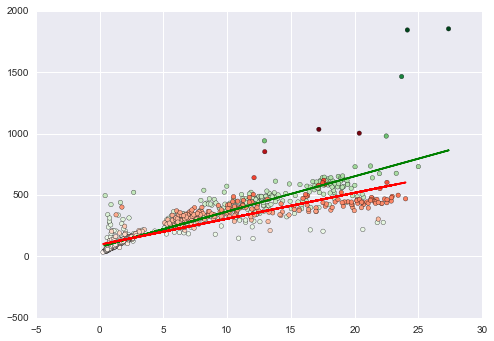

In [374]:
import matplotlib.cm as cm

fitb = np.polyfit(baseline4.amplitude, baseline4.peak_velocity, deg=1)
plt.plot(baseline4.amplitude, fitb[0] * baseline4.amplitude + fitb[1], color='green')
plt.scatter(baseline4.amplitude,baseline4.peak_velocity, c=baseline4.peak_velocity,cmap=cm.Greens)

fita = np.polyfit(alcohol4.amplitude, alcohol4.peak_velocity, deg=1)
plt.plot(alcohol4.amplitude, fita[0] * alcohol4.amplitude + fita[1], color='red')
plt.scatter(alcohol4.amplitude,alcohol4.peak_velocity,c=alcohol4.peak_velocity,cmap=cm.Reds)



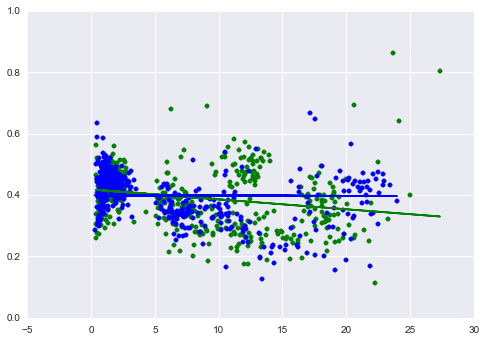

In [375]:
fitb = np.polyfit(baseline4.amplitude, baseline4.peak_percent, deg=1)
plt.plot(baseline4.amplitude, fitb[0] * baseline4.amplitude + fitb[1], color='green')
plt.scatter(baseline4.amplitude, baseline4.peak_percent,color='green')
fita = np.polyfit(alcohol4.trial, alcohol4.peak_percent, deg=1)
plt.plot(alcohol4.amplitude, fita[0] * alcohol4.amplitude + fita[1], color='blue')
plt.scatter(alcohol4.amplitude, alcohol4.peak_percent,color='blue')

In [215]:
frames2

,condition,id,trial,amp,peak_time,peak_percent,freqency,trial_start,amplitude,avg_velocity,duration,sac_end_time,sac_index,peak_velocity,sac_peak_velocity_time,sac_start_time,trial_saccade_total,trial_start_time
0,alcohol,1,1,5,11.000000,0.450933,10,0,2.402000,2.402000,24.800000,2237.200000,5.800000,139.906000,122343.400000,2213.400000,10,120119
1,alcohol,1,1,10,17.000000,0.435897,10,0,5.720000,5.720000,39.000000,1607.000000,5.000000,264.740000,121705.000000,1569.000000,10,120119
2,alcohol,1,1,20,28.000000,0.426690,10,0,16.275000,16.275000,65.500000,1672.500000,5.000000,418.650000,121755.000000,1608.000000,10,120119
3,alcohol,1,2,5,9.666667,0.480000,8,4386,1.836667,1.836667,20.333333,2430.333333,5.000000,123.890000,126925.666667,2411.000000,8,124505
4,alcohol,1,2,10,14.333333,0.270640,8,4386,7.410000,7.410000,55.666667,1492.000000,3.333333,230.330000,125956.666667,1437.333333,8,124505
5,alcohol,1,2,20,33.500000,0.649195,8,4386,17.580000,17.580000,54.000000,2751.000000,5.500000,620.130000,127236.500000,2698.000000,8,124505
6,alcohol,1,3,5,6.500000,0.434061,8,8529,0.842500,0.842500,15.500000,2476.250000,4.750000,68.762500,131116.250000,2461.750000,8,128648
7,alcohol,1,3,10,17.000000,0.386364,8,8529,9.310000,9.310000,44.000000,898.000000,2.000000,415.200000,129520.000000,855.000000,8,128648
8,alcohol,1,3,15,14.000000,0.126126,8,8529,13.370000,13.370000,111.000000,1832.000000,5.000000,210.840000,130384.000000,1722.000000,8,128648
9,alcohol,1,3,25,18.000000,0.169811,8,8529,21.850000,21.850000,106.000000,1357.000000,4.000000,303.900000,129918.000000,1252.000000,8,128648


In [207]:
baseline2

,condition,trial,amp,peak_time,peak_percent,freqency,trial_start,amplitude,avg_velocity,duration,sac_end_time,sac_index,peak_velocity,sac_peak_velocity_time,sac_start_time,trial_saccade_total,trial_start_time
0,baseline,1,10.625000,16.404762,0.411516,10.250000,0.000000,7.489208,7.489208,40.336310,1224.502381,4.004762,327.967113,346737.070833,1185.166071,10.250000,345535.500000
1,baseline,2,10.000000,15.304762,0.459120,9.333333,4293.333333,7.134837,7.134837,34.246429,1745.872222,4.788889,289.822187,306023.930556,1712.625794,9.333333,304296.000000
2,baseline,3,10.000000,14.866667,0.417011,8.200000,8467.800000,6.579167,6.579167,35.500000,1639.358333,4.483333,278.650417,328303.325000,1604.858333,8.200000,326683.600000
3,baseline,4,10.000000,14.726667,0.407886,7.000000,12705.600000,6.905300,6.905300,36.966667,1968.846667,3.466667,291.210467,332869.006667,1932.880000,7.000000,330921.400000
4,baseline,5,10.000000,14.805556,0.402579,10.000000,17191.333333,7.071071,7.071071,37.432540,2422.603175,5.059524,308.491865,404318.809524,2386.170635,10.000000,401917.833333
5,baseline,6,11.875000,15.916667,0.377878,8.000000,22337.500000,9.001417,9.001417,42.870833,2626.058333,5.037500,319.969333,429259.604167,2584.187500,8.000000,426659.500000
6,baseline,7,10.000000,15.448980,0.437323,9.571429,26603.428571,7.167347,7.167347,35.455782,2006.061224,4.727891,279.120952,388204.197279,1971.605442,9.571429,386217.142857
7,baseline,8,12.857143,18.466327,0.482911,9.142857,30415.428571,9.768510,9.768510,37.431633,2614.834694,5.569388,498.302837,325441.440816,2578.403061,9.142857,322844.571429
8,baseline,9,12.142857,17.966667,0.428161,8.000000,34917.857143,8.870810,8.870810,42.180952,1779.426190,3.916667,315.687357,323667.354762,1738.245238,8.000000,321911.142857
9,baseline,10,10.000000,19.733333,0.414883,7.800000,39776.600000,7.632667,7.632667,46.900000,1998.700000,3.833333,336.263333,359964.933333,1952.800000,7.800000,357992.400000


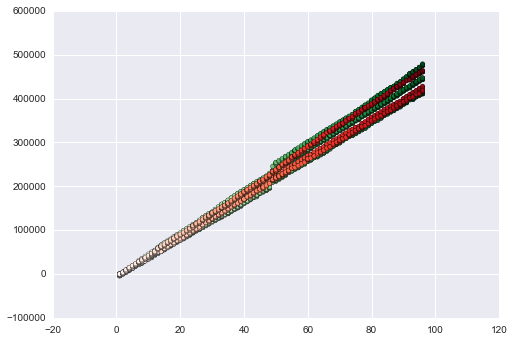

In [68]:
import matplotlib.cm as cm

plt.scatter(baseline.trial,baseline.latency, c=baseline.latency,cmap=cm.Greens)
plt.scatter(alcohol.trial,alcohol.latency,c=alcohol.latency,cmap=cm.Reds)

In [72]:
frames

,condition,id,trial,latency,peak_time,peak_percent,freqency,stage,trial_start,amplitude,avg_velocity,duration,sac_end_time,sac_index,peak_velocity,sac_peak_velocity_time,sac_start_time,trial_saccade_total,trial_start_time,trial_label
1,alcohol,1,1,-938,14,0.368421,10,,0,4.89,4.89,38,975,2,193.30,121071,938,10,120119,Trial: 1
2,alcohol,1,1,-1096,12,0.500000,10,,0,2.40,2.40,24,1119,3,162.73,121227,1096,10,120119,Trial: 1
3,alcohol,1,1,-1388,35,0.530303,10,,0,17.51,17.51,66,1453,4,428.98,121542,1388,10,120119,Trial: 1
4,alcohol,1,1,-1569,17,0.435897,10,,0,5.72,5.72,39,1607,5,264.74,121705,1569,10,120119,Trial: 1
5,alcohol,1,1,-1828,21,0.323077,10,,0,15.04,15.04,65,1892,6,408.32,121968,1828,10,120119,Trial: 1
6,alcohol,1,1,-2266,13,0.481481,10,,0,2.56,2.56,27,2292,7,180.29,122398,2266,10,120119,Trial: 1
7,alcohol,1,1,-2961,10,0.476190,10,,0,1.42,1.42,21,2981,8,106.39,123090,2961,10,120119,Trial: 1
8,alcohol,1,1,-3806,6,0.428571,10,,0,0.74,0.74,14,3819,9,56.82,123931,3806,10,120119,Trial: 1
10,alcohol,1,2,3582,17,0.340000,8,,4386,8.57,8.57,50,853,1,285.08,125326,804,8,124505,Trial: 2
11,alcohol,1,2,3436,13,0.500000,8,,4386,2.75,2.75,26,975,2,182.66,125468,950,8,124505,Trial: 2
